# Pandas ilə SQLvari sorğuların yazılması
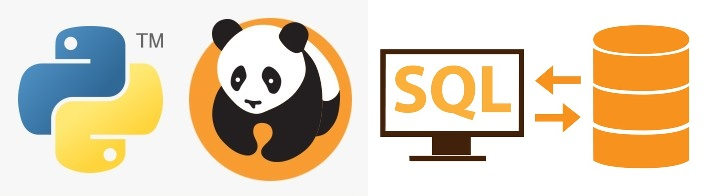

SQL ilə heç olmasa qismən tanışlığı olan adam *"SQL-in əsasların bir neçə saat ərzində öyrənib ilk sorğuları yazmaq olar"* cümləsi ilə razılaşar (hər halda mən bu cür fikirləşirəm). Python ilə də eynən, bu dil ən sadə və proqramlaşdırmanı öyrənməyə başlayanlar üçün ideal dil sayılır.
İndi, verilənlər elmi və məlumat analizi ən trend mövzu olan vaxtda Python-un **Pandas** modulu vasitəsi ilə SQL kimi məlumat emal etmə məqaləsi elə lap yerinə düşərdi, və budur o!

Jurnalda SQL-da DML (Məlumat Manipulyasiyası Dili) vasitəsi ilə icra olunan məlumatın sorğulanması (SELECT), məlumatın daxil olunması (INSERT), məlumat pozulması (DELETE) və məlumat yeniləməsi (UPDATE) komandalarının Pandas analoqları təqdim olunacaq. Hər iki variantda sorğular icra olunacaq və göstəriləcək.

#### Başlayaq!
İşə Pandasın importundan başlayırıq:

In [1]:
import pandas as pd

Jurnalın daxilində 2 cədvəldən istifadə olunacaq və onlar **dummy_data.xlsx** Excel faylının ayrı-ayrı səhifələrinə yerləşir.
* staff - İşçinin "unikal identifikatoru", "adı", "soyadı", "cinsi", "küçə", "şirkət", "vəzifəsi"
* staff_add_info - "unikal identifikatoru", "email ünvan", "aktivlik statusu", "istifadəçi adı", "MD5-də saxlanan şifrə", "mobil_nömrəsi"

Cədvəllərin ortaq identifikatoru - "guid" sütunudur.

İşləyəcəyimiz cədvəllər haqqında ümumi məlumat aldıq, datafreymlərə keçirmək olar:

In [2]:
# ilk öncə açacağımız faylın adın, sonra isə səhifənin adın qeyd edirik
staff_df = pd.read_excel('https://raw.githubusercontent.com/limpapud/datasets/master/Tutorial_datasets/SQL_Pandas.xlsx',sheet_name='staff') 
staff_add_info = pd.read_excel("https://raw.githubusercontent.com/limpapud/datasets/master/Tutorial_datasets/SQL_Pandas.xlsx",sheet_name='staff_add_info')

In [3]:
staff_df.head(3) # Məlumatın ilk 3 sətrin əks etdir

,guid,first_name,last_name,gender,street,company,job_title
0,6a9472d4-4949-4f98-8543-c6878d558422,Rhoda,Halbert,Female,NaN,Zooveo,Registered Nurse
1,3e89c11d-fd66-427f-a294-029fde1a4e40,Nial,Doggett,Male,Londonderry,Demizz,Account Executive
2,8c37f0ca-75c5-42f9-8f45-92f1fc2cb027,Valentina,Stenners,Female,Tony,Wikizz,Safety Technician I


In [4]:
staff_add_info(3) # Məlumatın ilk 3 sətrin əks etdir

TypeError: 'DataFrame' object is not callable

Pandas modulu ilə işin nümaişi 2 hissədən ibarət olacaq:
1. Real SQL əmr sorğusunun yazılması və icrası
2. Yazılmış sorğunun analoqunun datafreymlər üzərində Pandas vasitəsi ilə icrası

### SELECT

SQL-də SELECT əmri məlumatın sorğulanması və əldə edilməsi üçün istifadə olunur.

Deyək ki biz *staff_db* cədvəlindən bütün sütun və sətrləri əldə etmək istəyirik. Bunun üçün yazılmış SQL sorğusu aşağıdaki kimidir:

**SELECT * FROM staff_db**

Pandas vasitəsi ilə bu komandanı sadəcə datafreymin adın yazmaq ilə icra edə bilərsiniz.

In [ ]:
staff_df

**Ups!** Nədənsə (*əslində əlbəttə ki Pandasın standart ayarlarına uyğun, perfomans və praktiklik baxımından*) məlumat öyrəşdiyimiz SQL sorğulama zamanı kimi tam olaraq yox, hissə-hissə olaraq çıxdı, yəni yalnız ilk 30 və son 30 yazı əks olundu.

Bu məqamı nəzərə alaraq ayarlarda maksimal sətr və sütun sayın dəyişək və limitsiz edək.(***Diqqət! Real həyatda böyük həcmli verilənlər ilə iş zamanı bunu etməyin!!!***)

Maksimal sütun sayın *None* qeyd edib limitləri aradan qaldırırıq.

In [ ]:
pd.set_option('display.max_columns',None)

Maksimal sətr sayın *None* qeyd edib bu limitləri də aradan qaldırırıq.

In [ ]:
pd.set_option('display.max_rows',None)

Yenidən yoxlayaq ...

In [ ]:
staff_df

Əla. Davam etmək olar.

Növbəti məqsədimiz yalnız tələb olunan sütunları sorğulayıb 3-ün əks etdirməkdir

SQL versiya: **SELECT TOP(3) first_name, last_name, gender, job_title FROM staff_db**

Pandas versiyasında sorğunun məntiqi datafreym adından sonra tələb olunan sütun adların siyahı vasitəsi ilə təmin edərək *.head()* funksiyası köməkliyi ilə **ilk** 3 yazını əks etdirməkdir.

In [ ]:
staff_df[['first_name','last_name','gender','job_title']].head(3)

İlkin sorğu etməyə öyrəndik, növbə gəldi filterlərin əlavə olunmasına.

SQL versiya: **SELECT TOP(3) first_name, last_name, gender, job_title FROM staff_db WHERE gender = 'Male'**

Datafreym daxili filter əlavə etmək üçün **binar "maska"-dan** istifadə etməliyik. Amma nədir binar maska? O filterlənən sütun üzrə keçərək sütundakı hər bir sətr üzrə dəyərin tələb olunan dəyərə bərabər olub olmadığını yoxlayıb müvafiq olaraq True/False (Doğru\Yalnız) dəyəri verir. Sonra isə bu maska üzrə sütun üzrə əks olunan dəyərləri filterləmək mümkün olur.

Məsəl üçün Kişi cinsi üzrə maska yaradaq və əks etdirək:

In [ ]:
binar_maska = staff_df['gender']=='Male'
binar_maska.head(5)

İndi isə bu maskanı tətbiq edək və cavabları yoxlayaq:

In [ ]:
staff_df[['first_name','last_name','gender','job_title']][staff_df['gender']=='Male'].head(3)

Növbəti addım - istifadə olunan filterləri artıraq və zənqinləşdirək. Elə sorğu yazaq ki *yalnız cinsi 'Kişi'*  **VƏ** *vəzifəsi 'Account Executive' olan* **VƏ YA** *adı 'Valentina' olan işçilər* siyahısı çıxsın.

SQL versiya: **SELECT TOP(3) first_name, last_name, gender, job_title FROM staff_db WHERE (gender = 'Male' AND job_title = 'Account Executive') OR (first_name = 'Valentina')**

Pandas-da **VƏ** məntiqi ampersand ("***&***") vasitəsi ilə, **VƏ YA** məntiqi isə vertikal xətt ("**|**") vasitəsi ilə tənzimlənir.

In [ ]:
staff_df[['first_name','last_name','gender','job_title']][((staff_df['gender']=='Male') & (staff_df['job_title']=='Account Executive')) | (staff_df['first_name']=='Valentina')].head(3)

### UPDATE

SQL-də UPDATE əmri məlumatın dəyişdirilməsi və yenilənməsi üçün istifadə olunur.

SQL versiyası: **UPDATE staff_df SET gender = 'Male' WHERE (gender = 'Male' AND job_title = 'Account Executive') OR (first_name = 'Valentina'**)

Pandas ilə sətrləri yeniləmək üçün index ilə işləmək üçün *.loc* və yenə binar maskalardan istifadə edəcəyik.

Məntiq aşağıdaki kimidir: DataFreym_adı.loc[binar maska, dəyişməli sütun] = 'hədəf dəyər'

In [ ]:
staff_df.loc[((staff_df['gender']=='Male') & (staff_df['job_title']=='Account Executive')) | (staff_df['first_name']=='Valentina'),'gender']='Male'

In [ ]:
staff_df.head(3)

Dəyişiklikləri yoxlayaq. Bunun üçün filtr üzrə yazılmış yazılarda 'gender' sütunun yoxlayaq.

In [ ]:
staff_df[['first_name','last_name','gender','job_title']][((staff_df['gender']=='Male') & (staff_df['job_title']=='Account Executive')) | (staff_df['first_name']=='Valentina')].head(3)

 'Valentina' adlı istifadəçi sorğulanan parameterlərə uyğun gəldi və "Female"-dən "Male"-yə dəyişdi.

### INSERT

SQL-də INSERT əmri məlumatın əlavə olunması üçün istifadə olunur.

SQL variantı: ***INSERT INTO staff_df ('guid', 'first_name', 'last_name', 'gender', 'street', 'company', 'job_title')*** 

***VALUES***

***('6a9472d4-4949-4f98-8543-c6878d558422', 'Omar', 'Bayramov', 'Male', NULL, 'Limpapud', NULL)***

Pandas vasitəsi ilə isə eyni nəticə almaq üçün artıq tanış olan *.loc* indeks köməkçisindən istifadə edərək dəyərləri yeni **len(staff_df)** vasitəsi ilə aldığımız cədvəl uzunluğu indeksinə əlavə edirik.

In [ ]:
len(staff_df)

In [ ]:
staff_df.loc[len(staff_df)] = ['6a9472d4-4949-4f98-8543-c6878d558422','Omar','Bayramov','Male','NaN','Limpapud','NaN']

In [ ]:
staff_df.tail(3)

## DELETE

SQL-də DELETE əmri məlumatın silinməsi üçün istifadə olunur.

Hər-hansı bir məlumatı datafreymdən silmək istədikdə SQL-a əks məntiqdən istifadə etməliyik.

SQL variantı: ***DELETE FROM staff_db WHERE first_name = 'Omar'***

Yəni əgər SQL sorğu "***staff_db-dən 'Ömər' adlı işçiləri poz***" əmrin verirsə Pandas sorğusu "***staff_db-də "Ömər" adlı işçilərdən başqa hamısın saxla*** məntiqi istifadə edir.

In [ ]:
staff_df = staff_df.loc[staff_df['first_name'] != 'Omar']
staff_df.tail(3)

Hazırdır! Məlumat pozuldu.

### Jurnalın sonu

Jurnalın sonuna çatdınız. Oxuduğunuz üçün təşəkkürlər. Bu məqalə periodik olaraq yenilənəcək və əlavələr qəbul edəcək. Sizin əlavəniz, təklifiniz, iradınız olduğu halda GitHub vasitəsi ilə "İssue" yaradaraq və ya aşağıda qeyd olunmuş əlaqə vasitələri ilə fikrinizi bildirə bilərsiniz.

### Əlaqə

Müəllif ilə əlaqə omarbayramov@hotmail.com elektron ünvan üzərindən aparıla bilər. Əlavə olaraq sosial şəbəkə və digər saytlara linklər əlavə olunur.
[Facebook](https://www.facebook.com/Omar.X.Bayramov)
[Wordpress Blog](https://omarbayramov.wordpress.com/)
[LinkedIn](https://www.linkedin.com/in/omarbayramov/)
